In [1]:
from proj1_helpers import *
from implementations import *
from costs import *
from data_helper import *
from plots import *

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

# Importing the data

In [2]:
DATA_PATH = 'data/'
PREDICTION_PATH = 'predictions/'

In [39]:
y_tr, x_tr, ids_tr = load_csv_data(DATA_PATH + "train.csv")

print('y_tr.shape =', y_tr.shape)
print('x_tr.shape =', x_tr.shape)
print('ids_tr.shape =', ids_tr.shape)

y_tr.shape = (250000,)
x_tr.shape = (250000, 30)
ids_tr.shape = (250000,)


In [40]:
y_te, x_te, ids_te = load_csv_data(DATA_PATH + "test.csv")

print('y_te.shape =', y_te.shape)
print('x_te.shape =', x_te.shape)
print('ids_te.shape =', ids_te.shape)

y_te.shape = (568238,)
x_te.shape = (568238, 30)
ids_te.shape = (568238,)


# Additional functions

In [5]:
def fast_buildpoly(x,ma,degree):
    return np.c_[ma,np.power(x, degree)]

# Dataset exploration

In [6]:
df = pd.DataFrame(x_tr)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [7]:
df = pd.DataFrame(x_te)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.00000,568238.000000,...,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000
mean,-48.729241,49.258387,81.122338,57.829094,-707.441800,-599.731058,-708.384205,2.374211,18.99262,158.668286,...,-0.007981,209.957809,0.980251,-348.946261,-399.886426,-399.899229,-691.293904,-708.143299,-708.146201,73.267629
std,406.018702,35.393465,40.474035,63.304450,454.931763,659.054554,453.464437,0.779978,21.76045,116.258246,...,1.812916,126.956060,0.979394,533.156405,489.468578,489.458204,480.450337,453.837535,453.832741,98.470522
min,-999.000000,0.000000,6.810000,0.000000,-999.000000,-999.000000,-999.000000,0.237000,0.00000,46.103000,...,-3.142000,13.847000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.191000,19.330000,59.425000,14.202250,-999.000000,-999.000000,-999.000000,1.815000,2.83800,77.463000,...,-1.574000,122.972250,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.080000,46.467000,73.740000,38.472000,-999.000000,-999.000000,-999.000000,2.492000,12.41300,120.666000,...,-0.016000,179.940000,1.000000,38.968000,-1.862000,-2.110000,-999.000000,-999.000000,-999.000000,40.504000
75%,130.775500,73.630000,92.162750,79.256000,0.503000,84.305500,-4.532000,2.962000,27.65100,201.073000,...,1.559000,264.024750,2.000000,75.520000,0.431000,0.483000,33.838000,-2.427000,-2.260000,110.566500
max,1949.261000,968.669000,1264.965000,1337.187000,8.724000,4794.827000,17.650000,5.751000,759.36300,2079.162000,...,3.142000,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000


# Dataset cleaning

In [9]:
x_without_minus999 = remove_missing_values(x_tr)
df = pd.DataFrame(x_without_minus999)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,73.064591
std,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,98.015662
min,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,0.000000
25%,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,0.000000
50%,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,40.512500
75%,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,109.933750
max,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1633.433000


In [11]:
x_minus999_to_mean = set_missing_values_to_mean(x_tr)
df = pd.DataFrame(x_minus999_to_mean)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591
std,52.749898,35.344886,40.828691,63.655682,0.938491,214.230095,1.930801,0.782911,22.273494,115.706115,...,1.812223,126.499506,0.977426,47.002359,1.382702,1.405048,17.229894,1.094446,0.978743,98.015662
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
25%,95.665000,19.241000,59.388750,14.068750,2.403735,371.783360,-0.821688,1.810000,2.841000,77.550000,...,-1.575000,123.017500,0.000000,57.439000,-0.433000,-0.556000,57.679474,-0.011845,-0.001582,0.000000
50%,119.958000,46.524000,73.752000,38.467500,2.403735,371.783360,-0.821688,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,40.512500
75%,130.606250,73.598000,92.259000,79.169000,2.403735,371.783360,-0.821688,2.961000,27.591000,200.478250,...,1.561000,263.379250,2.000000,84.822105,0.433000,0.503000,57.679474,-0.011845,-0.001582,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


# Model 1: Linear Regression (without missing values)

In [13]:
degrees = np.arange(30) + 1
acc_1 = []
polyx_1 = np.ones((x_without_minus999.shape[0], 1))

for degree in degrees:
    polyx_1 = fast_buildpoly(x_without_minus999, polyx_1, degree)
    w_1, loss = least_squares(y_tr, polyx_1)
    acc_1.append(compute_categorical_loss(y_tr, polyx_1, w_1))

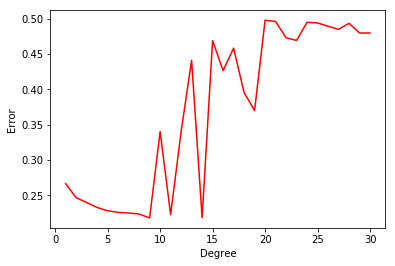

Min = 0.217956
Best degree = 9


In [14]:
plt.plot(degrees, acc_1, 'r') 
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()
print('Min =', min(acc_1))
print('Best degree =', acc_1.index(min(acc_1)) + 1)

# Model 2: Linear regression (missing values set to the mean)

In [15]:
degrees = np.arange(30) + 1
acc_2 = []
polyx_2 = np.ones((x_minus999_to_mean.shape[0], 1))
for degree in degrees:
    polyx_2 = fast_buildpoly(x_minus999_to_mean, polyx_2, degree)
    w_2, loss = least_squares(y_tr, polyx_2)
    acc_2.append(compute_categorical_loss(y_tr, polyx_2, w_2))

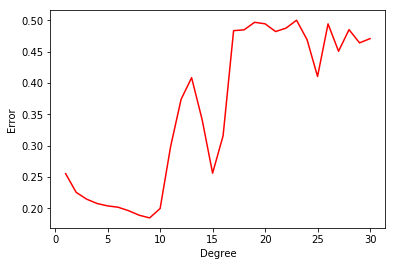

Min = 0.184868
Best degree = 9


In [16]:
plt.plot(degrees, acc_2, 'r') 
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()
print('Min =', min(acc_2))
print('Best degree =', acc_2.index(min(acc_2)) + 1)


# Model 3: training over subset

In [6]:
x_sub0=[]
x_sub1=[]
x_sub23=[]
y_sub0=[]
y_sub1=[]
y_sub23=[]

for i in range(len(x_tr)):
    if x_tr[i][22]==0:
        x_sub0.append(x_tr[i])
        y_sub0.append(y_tr[i])
    elif x_tr[i][22]==1:
        x_sub1.append(x_tr[i])
        y_sub1.append(y_tr[i])
    else:
        x_sub23.append(x_tr[i])
        y_sub23.append(y_tr[i])

In [7]:
def filter_sub(x_sub, sup=True):
    num_minus_999=np.zeros(30)
    for x in x_sub:
        for i in range(len(x)):
            if x[i]==-999:
                num_minus_999[i]+=1
    idex=[]
    if sup:
        idex.append(22) 
    for i in range(len(num_minus_999)):
        if num_minus_999[i]==len(x_sub):
               idex.append(i) 
    x_fil=np.delete(x_sub,idex,1)
    
    print(idex)
    return set_missing_values_to_mean(x_fil)

## Train subset 0:

In [8]:
filx_0=filter_sub(x_sub0)
y_sub0=np.array(y_sub0)
filx_0=np.array(filx_0)

[22, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]


In [9]:
for i in range(18):
    for j in range(18):
        if i != j and i < j:
            corr = np.abs(np.corrcoef(filx_0.T[j],filx_0.T[i])[1][0])
            if corr > 0.8:
                print(str(i)+" , "+str(j)+" : "+ str(corr))

3 , 5 : 0.999999999999
6 , 9 : 0.800268853333


In [10]:
filtx_0=np.delete(filx_0,[3],1)
print(np.shape(filtx_0))

(99913, 18)


In [11]:
degrees = np.arange(14) + 1
acc_2 = []
poly_2 = np.ones((filtx_0.shape[0], 1))
for degree in degrees:
    poly_2 = fast_buildpoly(filtx_0,poly_2, degree)
    w_2, loss = ridge_regression(y_sub0, poly_2,10**-20)
    acc_2.append(compute_categorical_loss(y_sub0, poly_2, w_2))

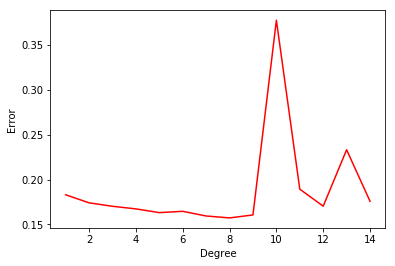

Min = 0.157326874381
Best degree = 8


In [12]:
plt.plot(degrees, acc_2, 'r') 
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()
print('Min =', min(acc_2))
print('Best degree =', acc_2.index(min(acc_2)) + 1)

In [13]:
poly_0=build_poly(filtx_0,8)
w3_0_final, loss = ridge_regression(y_sub0, poly_0,10**-20)
print(compute_categorical_loss(y_sub0, poly_0,w3_0_final))

0.157326874381


## Train subset 1:

In [14]:
filx_1=filter_sub(x_sub1)
y_sub1=np.array(y_sub1)
filx_1=np.array(filx_1)

[22, 4, 5, 6, 12, 26, 27, 28]


In [15]:
for i in range(18):
    for j in range(18):
        if i != j and i < j:
            corr = np.abs(np.corrcoef(filx_1.T[j],filx_1.T[i])[1][0])
            if corr > 0.9:
                print(str(i)+" , "+str(j)+" : "+ str(corr))

In [16]:
##filtx_1=np.delete(filx_1,[3],1)
filtx_1=filx_1
print(np.shape(filtx_1))

(77544, 22)


In [17]:
degrees = np.arange(14) + 1
acc_2 = []
poly_2 = np.ones((filtx_1.shape[0], 1))
for degree in degrees:
    poly_2 = fast_buildpoly(filtx_1,poly_2, degree)
    w_2, loss = ridge_regression(y_sub1, poly_2,0)
    acc_2.append(compute_categorical_loss(y_sub1, poly_2, w_2))

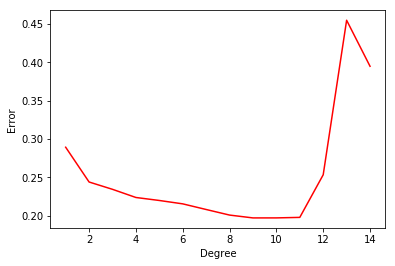

Min = 0.197062313009
Best degree = 9


In [18]:
plt.plot(degrees, acc_2, 'r') 
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()
print('Min =', min(acc_2))
print('Best degree =', acc_2.index(min(acc_2)) + 1)

In [19]:
poly_1=build_poly(filtx_1,9)
w3_1_final, loss = ridge_regression(y_sub1, poly_1,10**-20)
print(compute_categorical_loss(y_sub1, poly_1,w3_1_final))

0.197062313009


## Train subset 2,3:


In [20]:
filx_23=filter_sub(x_sub23,sup=False)
y_sub23=np.array(y_sub23)
filx_23=np.array(filx_23)

[]


In [21]:
for i in range(18):
    for j in range(18):
        if i != j and i < j:
            corr = np.abs(np.corrcoef(filx_23.T[j],filx_23.T[i])[1][0])
            if corr > 0.8:
                print(str(i)+" , "+str(j)+" : "+ str(corr))

0 , 2 : 0.820434478406
4 , 6 : 0.835992768083


In [22]:
filtx_23=filx_23
print(np.shape(filtx_23))

(72543, 30)


In [23]:
degrees = np.arange(14) + 1
acc_2 = []
poly_2 = np.ones((filtx_23.shape[0], 1))
for degree in degrees:
    poly_2 = fast_buildpoly(filtx_23,poly_2, degree)
    w_2, loss = ridge_regression(y_sub23, poly_2,0)
    acc_2.append(compute_categorical_loss(y_sub23, poly_2, w_2))

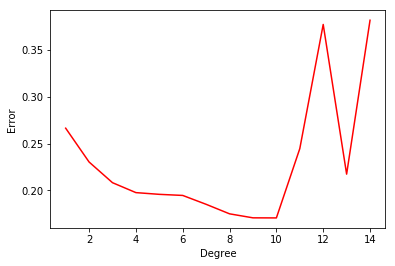

Min = 0.17057469363
Best degree = 10


In [24]:
plt.plot(degrees, acc_2, 'r') 
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()
print('Min =', min(acc_2))
print('Best degree =', acc_2.index(min(acc_2)) + 1)

In [25]:
poly_23=build_poly(filtx_23,10)
w3_23_final, loss = ridge_regression(y_sub23, poly_23,10**-20)
print(compute_categorical_loss(y_sub23, poly_23,w3_23_final))

0.17057469363


## create pred

In [37]:
xte_sub0 = []
xte_sub1 = []
xte_sub23= []
xte_ind = []
for i in range(len(x_tr)):
    if x_tr[i]==0:
        xte_sub0.append(x_tr[i])
        xte_ind.append(0)
    elif x_tr[i]==1:
        xte_sub1.append(x_tr[i])
        xte_ind.append(1)
    else:
        xte_sub23.append(x_tr[i])
        xte_ind.append(2)

In [38]:
in0=0
in1=0
in2=0
yres0=xte_sub0
yres1=xte_sub1
yres23=xte_sub23
yresf=[]
for i in range(len(x_tr)):
    if xte_ind[i]==0:
        yresf.append(yres0[in0])
        in0+=1
    if xte_ind[i]==1:
        yresf.append(yres1[in1])
        in1+=1
    if xte_ind[i]==2:
        yresf.append(yres23[in2])
        in2+=1
print(yresf)       

[0, 1, 1, 2, 1, 3, 0]
